In [1]:
! git clone "https://github.com/gdbwoo/DS-3001-Projects"

Cloning into 'DS-3001-Projects'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 96 (delta 27), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (96/96), 9.50 MiB | 7.00 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [2]:
# Import all packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Pipeline tools:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
# Variable transformers for cleaning:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
# Analytics:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression

In [3]:
# Observe all unfiltered data
df = pd.read_csv("/content/DS-3001-Projects/Project 2/fhs_train.csv")
print(df.shape)
print()

(3180, 17)



In [4]:
# Remove all missing values/na's
print(df.isna().sum()) # a lot of na's present in the dataset
df = df.dropna() # drop all na's (refer to appendix A for alternative methods attempted)
print(df.shape) # observe new dataframe shape
print(df.head()) # observe new data

Unnamed: 0           0
sex                  0
age                  0
education           85
currentSmoker        0
cigsPerDay          24
BPMeds              37
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             39
sysBP                0
diaBP                0
BMI                 15
heartRate            0
glucose            285
TenYearCHD           0
dtype: int64
(2744, 17)
   Unnamed: 0  sex  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1267    1   58        1.0              0         0.0     0.0   
1        1209    0   40        1.0              1        15.0     0.0   
3        1183    1   38        2.0              1        43.0     0.0   
4        3225    0   43        1.0              0         0.0     0.0   
6        1054    0   54        1.0              0         0.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                0             0         0    220.0  143.0  104.0  29.

In [5]:
# Testing data dimensions before and after NA's are dropped
df_test = pd.read_csv("/content/DS-3001-Projects/Project 2/fhs_test.csv")
print(df_test.shape)
df_test = df_test.dropna()
print(df_test.shape)

(1060, 17)
(914, 17)


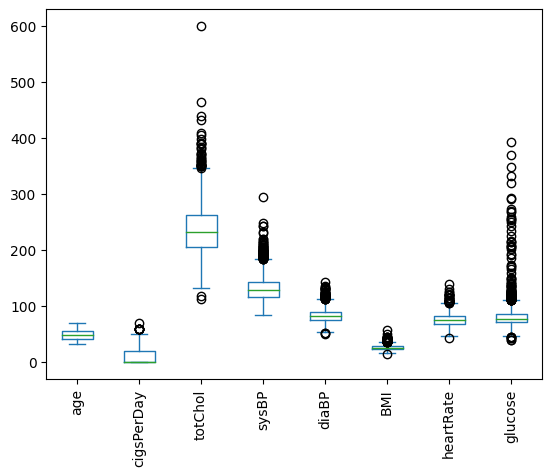

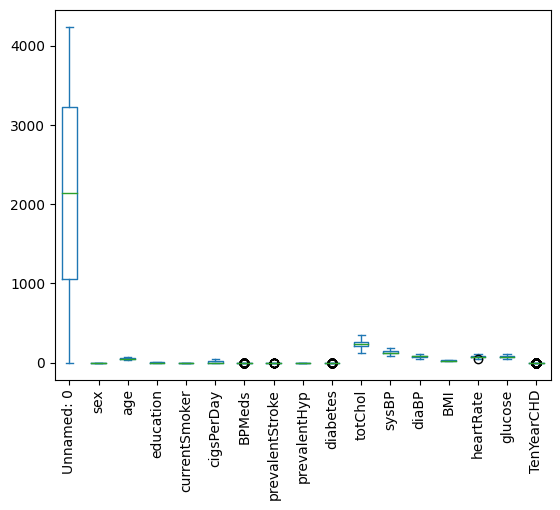

In [6]:
# Outlier detection of numeric variables and winsorizing of outliers

numeric_only = df.loc[:,['age','cigsPerDay', 'totChol','sysBP',
           'diaBP', 'BMI', 'heartRate', 'glucose']]
numeric_only.plot.box()
plt.xticks(rotation=90)
plt.show()
def winsorize(x):
    # Convert from pd to np, if necessary:
    if type(x) == 'pandas.core.series.Series':
        x = x.to_numpy()
    # Compute IQR and 25, 75 quantiles:
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windorize x:
    x_winsor = np.copy(x)
    x_winsor[ x < lower_whisker ] = lower_whisker
    x_winsor[ x > upper_whisker ] = upper_whisker
    return(x_winsor)

df['cigsPerDay'] = winsorize(df['cigsPerDay'])
df['totChol'] = winsorize(df['totChol'])
df['sysBP'] = winsorize(df['sysBP'])
df['diaBP'] = winsorize(df['diaBP'])
df['BMI'] = winsorize(df['BMI'])
df['heartRate'] = winsorize(df['heartRate'])
df['glucose'] = winsorize(df['glucose'])

# sns.boxplot( winsorize(numeric_only['glucose']))
# plt.show()
df.plot.box()
plt.xticks(rotation=90)
plt.show()

count    2744.000000
mean        0.154519
std         0.361511
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TenYearCHD, dtype: float64


TenYearCHD
0    2320
1     424
Name: count, dtype: int64

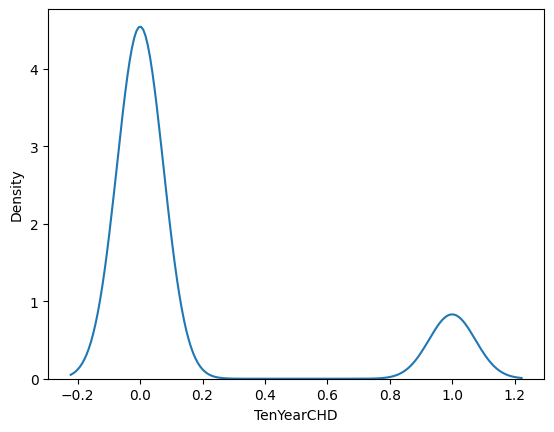

In [7]:
# Response Variable plot
sns.kdeplot(df,x="TenYearCHD")
print(df['TenYearCHD'].describe())
df['TenYearCHD'].value_counts()

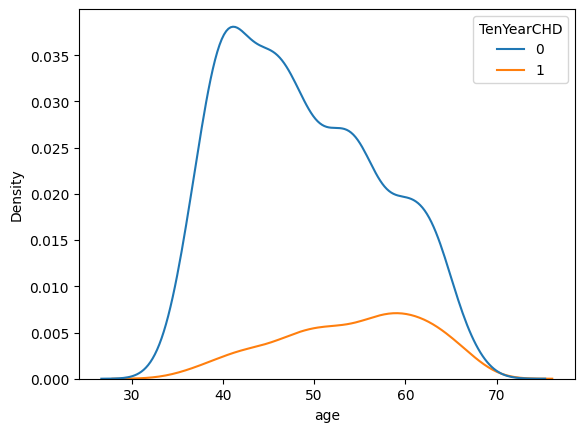

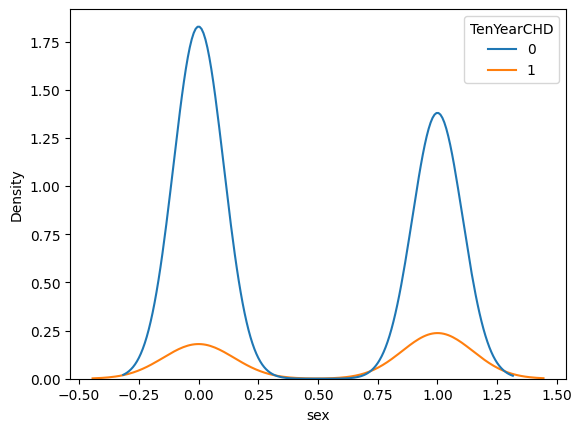

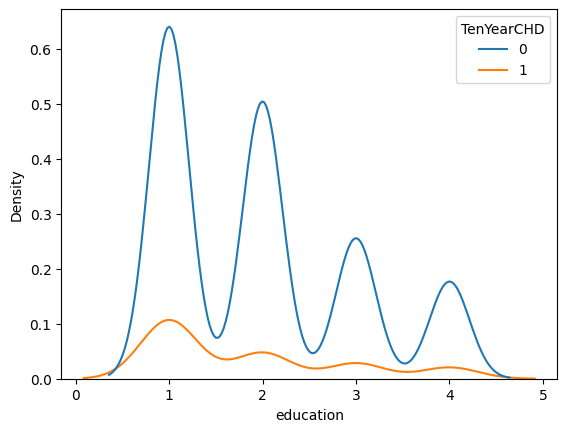

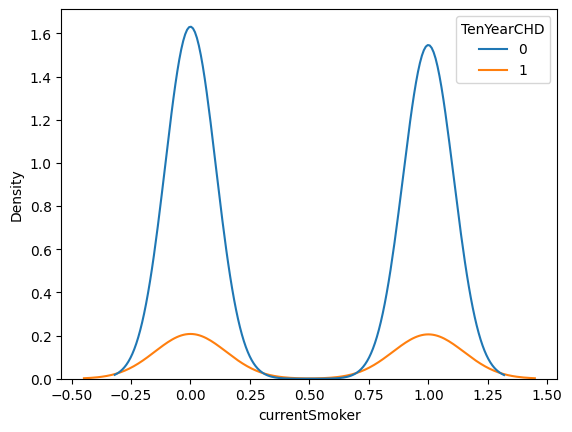

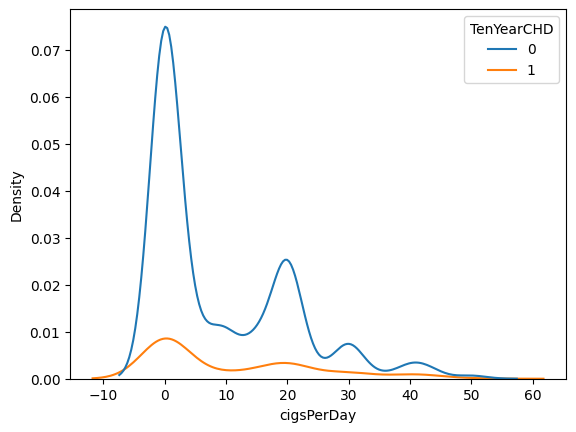

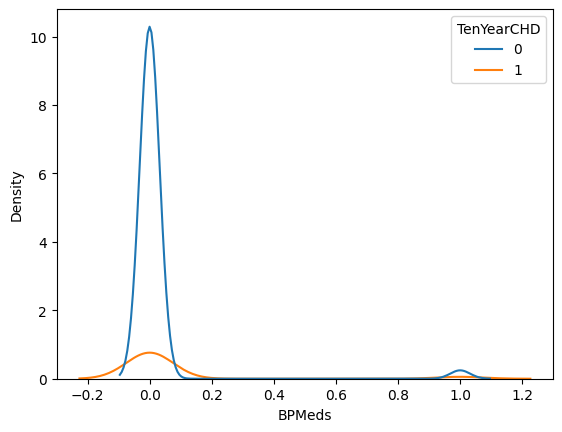

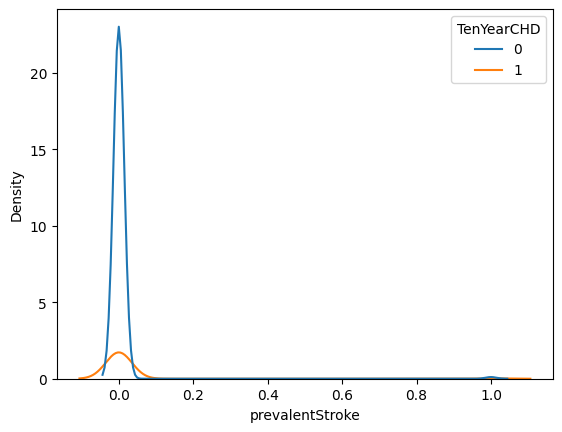

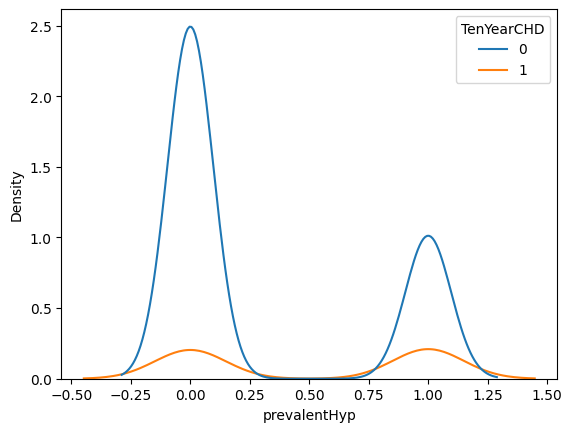

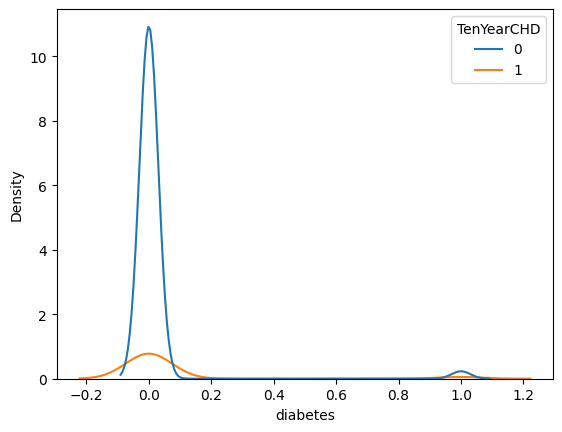

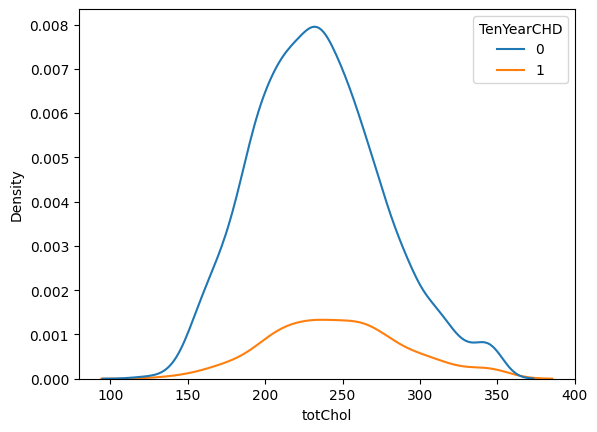

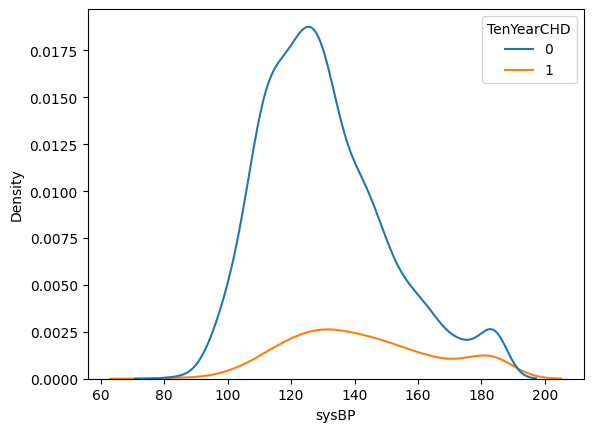

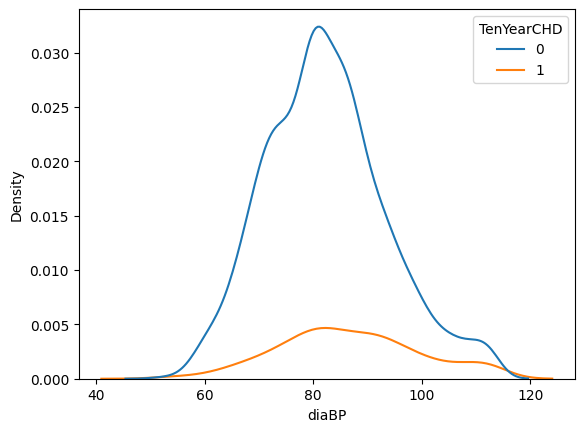

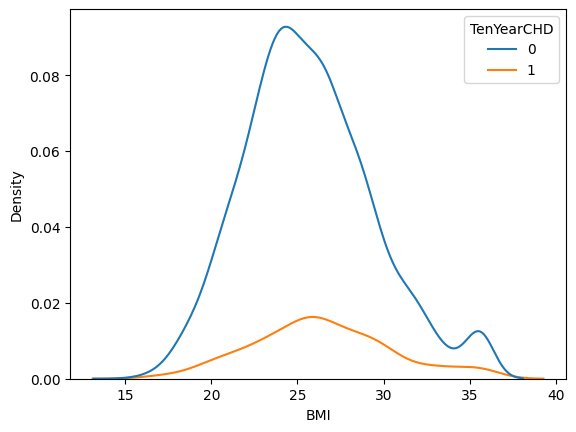

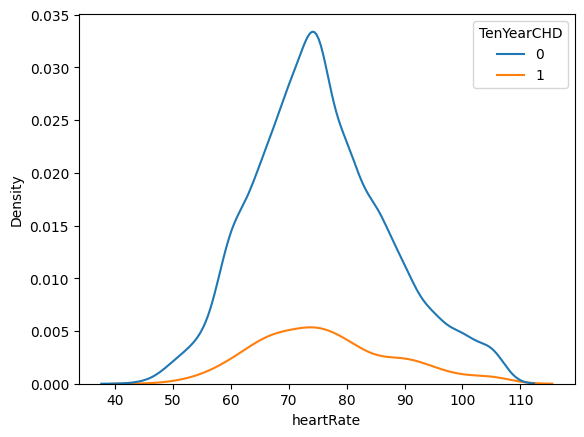

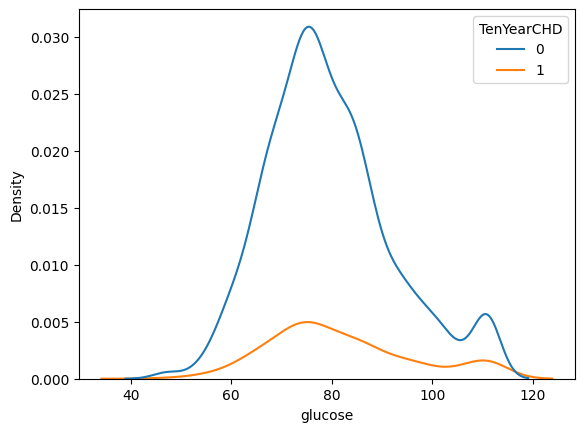

In [8]:
# Main EDA visualizations (Density Plots)

sns.kdeplot(data=df,x='age',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='sex',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='education',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='currentSmoker',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='cigsPerDay',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='BPMeds',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='prevalentStroke',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='prevalentHyp',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='diabetes',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='totChol',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='sysBP',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='diaBP',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='BMI',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='heartRate',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='glucose',hue='TenYearCHD')
plt.show()


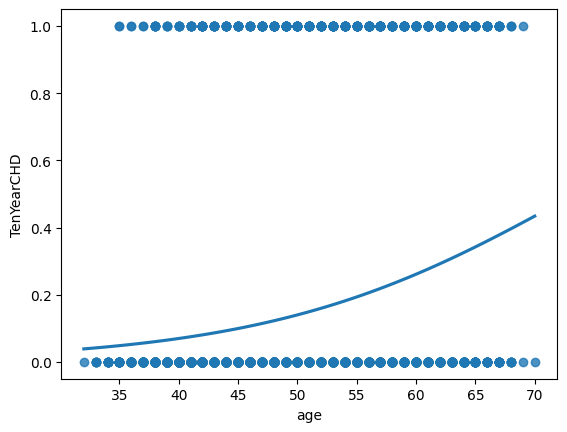

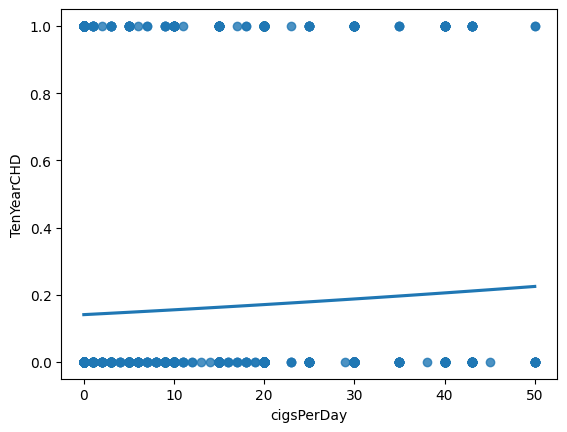

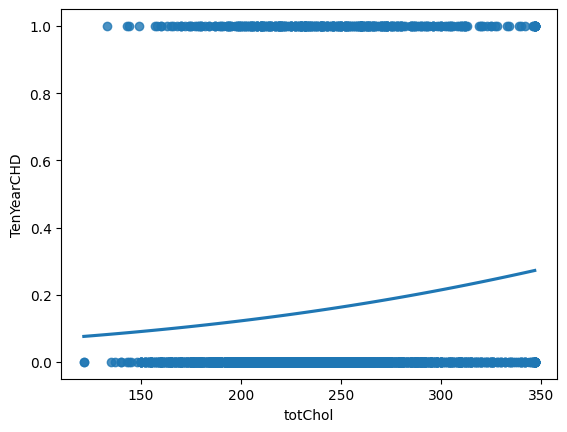

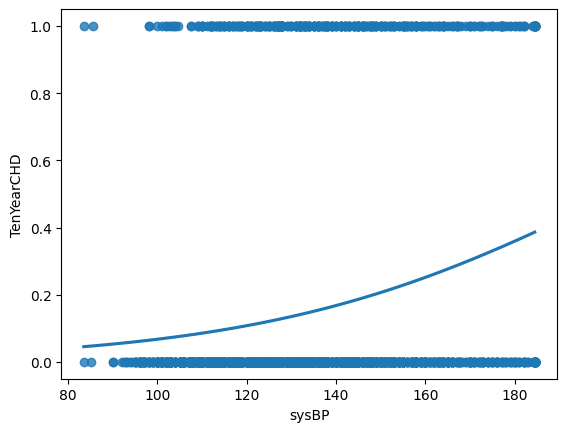

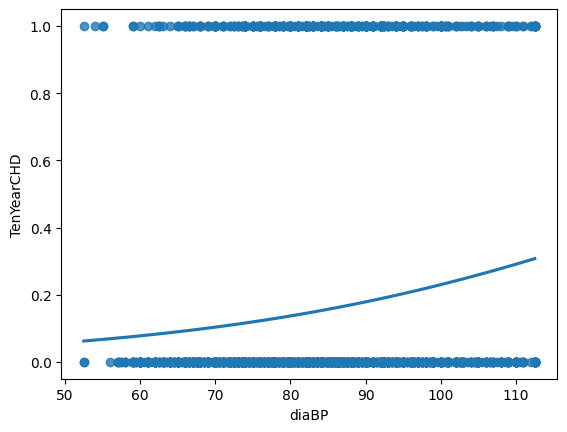

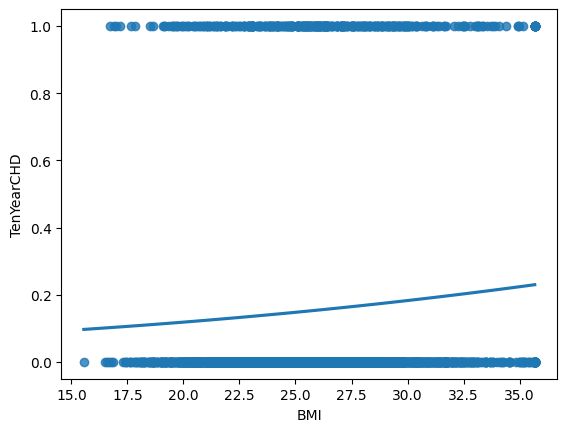

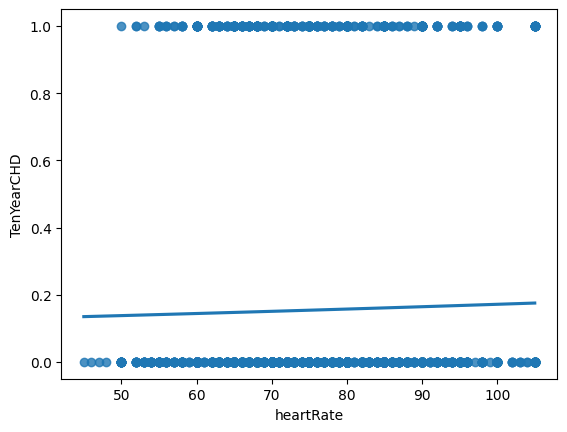

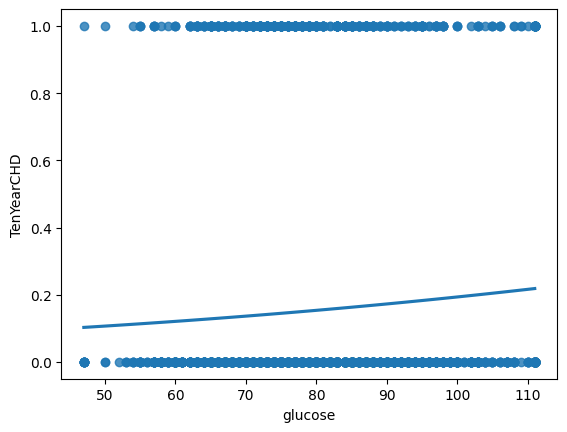

In [10]:
# Move to index; used to look at different relationship between response and predictors

sns.regplot(data=df,x="age",y="TenYearCHD", logistic=True, ci=None)
plt.show()
sns.regplot(data=df,x="cigsPerDay",y="TenYearCHD", logistic=True, ci=None)
plt.show()
sns.regplot(data=df,x="totChol",y="TenYearCHD", logistic=True, ci=None)
plt.show()
sns.regplot(data=df,x="sysBP",y="TenYearCHD", logistic=True, ci=None)
plt.show()
sns.regplot(data=df,x="diaBP",y="TenYearCHD", logistic=True, ci=None)
plt.show()
sns.regplot(data=df,x="BMI",y="TenYearCHD", logistic=True, ci=None)
plt.show()
sns.regplot(data=df,x="heartRate",y="TenYearCHD", logistic=True, ci=None)
plt.show()
sns.regplot(data=df,x="glucose",y="TenYearCHD", logistic=True, ci=None)
plt.show()

In [ ]:
# 1. Finalize data from Pandas:

# Training
y = df['TenYearCHD']

Z = df.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]


# Testing
y_test= df_test["TenYearCHD"]

X_test = df_test.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]


# 2. Set up variable preprocessing:
cat_vars = ['sex','education','currentSmoker','BPMeds',
           'prevalentStroke','prevalentHyp','diabetes'] # List of categorical variables
num_vars = ['age','cigsPerDay', 'totChol','sysBP',
           'diaBP', 'BMI', 'heartRate', 'glucose'] # List of numeric variables

cat_pipeline = Pipeline(steps = [('ohc', OneHotEncoder(sparse_output=False))]) # One hot encoding
num_pipeline = Pipeline(steps = [('maxmin', StandardScaler()) # Maxmin scaling
                                 ])

#('imputer', SimpleImputer(strategy='median'))# Imputation for missing values

# 3. Column transformer:
preprocessor = ColumnTransformer(
    transformers = [('cat', cat_pipeline, cat_vars), # Transform cat_vars by cat_pipeline
                    ('num', num_pipeline, num_vars)]) # Transform num_vars by num_pipeline

# 4. Create model-specific pipelines:
lm_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                ('linreg', LinearRegression(fit_intercept=False))]) # Link preprocessor to model
tree_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                ('tree', DecisionTreeRegressor(max_depth = 6))]) # Link preprocessor to model

# 5. Train-test split:
#X_train, X_test, y_train, y_test = train_test_split(Z, y, # Feature and target variables
#                                                    test_size=.2) # For replication purposes
# This step not needed since our datasets are already divided by training and testing

# 6. Fit the models:
lm = lm_pipe.fit(Z, y)
tree = tree_pipe.fit(Z, y)

# Linear Results on Train
print('Linear Model rsq: ', lm.score(Z, y) ) # R-squared
print(lm.named_steps['linreg'].coef_) # Regression coefficients

# Tree Results on Train
print('Tree rsq: ', tree.score(Z, y) )

Linear Model rsq:  0.09524148525542797
[-1.03981940e+12 -1.03981940e+12 -2.11076272e+12 -2.11076272e+12
 -2.11076272e+12 -2.11076272e+12 -4.29479729e+12 -4.29479729e+12
  3.92535004e+12  3.92535004e+12  2.88953033e+12  2.88953033e+12
 -2.05356207e+12 -2.05356207e+12  2.68406110e+12  2.68406110e+12
  6.10193119e-02  3.32641602e-02  1.12762451e-02  5.15518188e-02
 -1.89666748e-02 -4.93621826e-03  1.51062012e-03  5.68771362e-03]
Tree rsq:  0.23199132242157572


In [ ]:
# Tried it with variables that showed a relationship between TenYearCHD

# Z = df.loc[:,['age','cigsPerDay']]
# y = df['TenYearCHD']
# X_test = df_test.loc[:,['age','cigsPerDay']]
# y_test = df_test['TenYearCHD']

# #cat_vars = ['education']
# num_vars = ['age','cigsPerDay']


# #cat_pipeline = Pipeline(steps = [('ohc', OneHotEncoder(sparse_output=False))]) # One hot encoding
# num_pipeline = Pipeline(steps = [('maxmin', StandardScaler()) # Maxmin scaling
#                                  ])
# preprocessor = ColumnTransformer(
#     transformers = [#('cat', cat_pipeline, cat_vars), # Transform cat_vars by cat_pipeline
#                     ('num', num_pipeline, num_vars)])

# lm_pipe = Pipeline(steps=[('preprocessor', preprocessor),
#                 ('linreg', LinearRegression(fit_intercept=False))])
# lm = lm_pipe.fit(Z, y)
# print('Linear Model rsq: ', lm.score(X_test, y_test))

Linear Model rsq:  -0.10989363694874088


Linear Model rsq:  0.08692509724670894
[-1.03981940e+12 -1.03981940e+12 -2.11076272e+12 -2.11076272e+12
 -2.11076272e+12 -2.11076272e+12 -4.29479729e+12 -4.29479729e+12
  3.92535004e+12  3.92535004e+12  2.88953033e+12  2.88953033e+12
 -2.05356207e+12 -2.05356207e+12  2.68406110e+12  2.68406110e+12
  6.10193119e-02  3.32641602e-02  1.12762451e-02  5.15518188e-02
 -1.89666748e-02 -4.93621826e-03  1.51062012e-03  5.68771362e-03]
Tree rsq:  -0.002072798097890516


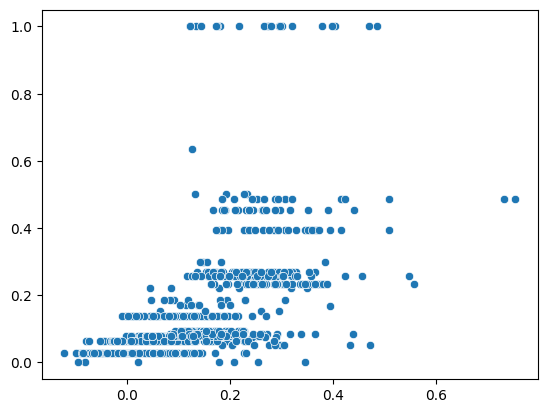

In [ ]:
# 7. Extract results:

# Linear Results on Test
print('Linear Model rsq: ', lm.score(X_test, y_test) ) # R-squared
print(lm.named_steps['linreg'].coef_) # Regression coefficients
y_hat_lm = lm.predict(X_test) # Predicted values

# Tree Results on Test
print('Tree rsq: ', tree.score(X_test, y_test) ) # R-squared
y_hat_tree = tree.predict(X_test)

# Plot
sns.scatterplot(x=y_hat_lm, y=y_hat_tree)
plt.show()

In [ ]:
# 1. Finalize data from Pandas:
df

# y = df['TenYearCHD']

# Z = df.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
#        'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
#        'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]

# x = df.loc[:,['age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]


df_logit = pd.get_dummies(df, columns=['sex','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes'], drop_first=True)

# #view updated DataFrame

df_logit= df_logit.astype(int)

df_logit
df_logit.columns.unique()

y = df_logit['TenYearCHD']
x = df_logit[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose', 'sex_1', 'education_2.0', 'education_3.0', 'education_4.0',
       'currentSmoker_1', 'BPMeds_1.0', 'prevalentStroke_1', 'prevalentHyp_1',
       'diabetes_1']]


x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

#view summary of model fit
print(model.summary())

logit_model = sm.Logit(y, x)
result = logit_model.fit()
print(result.summary())

# **Appendix**

Alternative attempts/methods that resulted in lower model performance

In [ ]:
# A

# Instead of dropping all missing values/na's:

# Remove all missing values/na's from categorical variables
# df.dropna(subset = ['sex','education','currentSmoker','BPMeds', 'prevalentStroke','prevalentHyp','diabetes'], inplace=True)

# Impute all numerical variables with median
# df['age'] = df['age'].fillna(df['age'].median())
# df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
# df['totChol'] = df['totChol'].fillna(df['totChol'].median())
# df['sysBP'] = df['sysBP'].fillna(df['sysBP'].median())
# df['diaBP'] = df['diaBP'].fillna(df['diaBP'].median())
# df['BMI'] = df['BMI'].fillna(df['BMI'].median())
# df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())
# df['glucose'] = df['glucose'].fillna(df['glucose'].median())

In [ ]:
# B

# Instead of Z containing all variables at the finalizing data from pandas step, only use the categorical data or only use the numerical data:

# Z = df.loc[:,['age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']] # num
# Z = df.loc[:,['sex', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']] # cat

# preprocessor = ColumnTransformer(
#      transformers = [ # Transform cat_vars by cat_pipeline
#                      ('num', num_pipeline, num_vars)])

# preprocessor = ColumnTransformer(
#      transformers = [ # Transform cat_vars by cat_pipeline
#                      ('cat', cat_pipeline, cat_vars)])

In [ ]:
# C

# Instead of dividing between cat and num and processing through their own pipelines, process all variables into one pipeline:

# vars = ['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
#        'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
#        'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# pipeline = Pipeline(steps = [('maxmin', StandardScaler()) # Maxmin scaling
# ])

# preprocessor = ColumnTransformer(
#     transformers = [('catnum', pipeline, vars)])

In [ ]:
# D

# Used OLS method and looked at significance of variables to use only most significant ones

# import statsmodels.api as sm

# # Create your model
# X = df.loc[:,['sex','age','cigsPerDay',"totChol",'sysBP']]
# y = df['TenYearCHD']
# X = sm.add_constant(X) # Add a constant term if needed
# model = sm.OLS(y, X).fit()

# # Get the summary
# print(model.summary())